In [19]:
from bs4 import BeautifulSoup
import pandas as pd
import requests

In [20]:
# Set the URL of the paginated webpage that you want to scrape
url = "https://www.airlinequality.com/airline-reviews/british-airways"

# Initialize an empty list to store the data that you scrape
data = []

# Setting the initial page number and the increment that you want to use to paginate through the webpage
page_num = 1
page_incr = 1
page_size = 100
# maximum number of pages to be scraped
max_pages = 20

# Set the URL of the webpage to be scraped 
paginated_url = f"{url}/page/{page_num}/?sortby=post_date%3ADesc&pagesize={page_size}"

# A while loop to paginate through the webpage and scrape the data
while page_num <= max_pages:

    print(f"Scraping page {page_num}")

    # A GET request to the paginated URL
    response = requests.get(paginated_url)

    # Parsing the response using BeautifulSoup
    parsed_content = BeautifulSoup(response.text, "html.parser")

    # Finding all the elements on the page that contain the data to be scraped
    elements = parsed_content.find_all("div",class_ = "body")

    # Looping through the elements and extract the data that you want to scrape
    for element in elements:
        header = element.find("h2",class_ = "text_header").text.replace("\n", " ")
        sub_header = element.find("h3",class_ = "text_sub_header").text.replace("\n", " ")
        content = element.find("div",class_ = "text_content").text.replace("\n", " ")
        
        data.append([header,sub_header,content])
    
    # Increasing the page number and setting the paginated URL to the new page
    page_num += page_incr
    paginated_url = f"{url}/page/{page_num}/?sortby=post_date%3ADesc&pagesize={page_size}"

    print(f"   ---> {len(data)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews


In [29]:
#Coverting the list data into a dataframe
df = pd.DataFrame(data)
df.columns = ["REVIEW","PERSONAL INFO","CONTENT"]

#Removing unwanted text(first text preprocessing)
df.replace(re.compile(r'\s*✅ Trip Verified \|\s*'), '', inplace=True)
df

,REVIEW,PERSONAL INFO,CONTENT
0,"""Lots of cancellations and delays""",Arsham Parsi (Canada) 15th February 2023,Lots of cancellations and delays and no one ap...
1,"""Overall, very happy with BA""",Keat Tan (United Kingdom) 7th February 2023,BA 242 on the 6/2/23. Boarding was delayed due...
2,"""the best airline I've flown with""",Adam Churchill (Spain) 6th February 2023,"Not only my first flight in 17 years, but also..."
3,"""so determined to help""",Maria del Carmen Riesco Martin (United Kingd...,My husband and myself were flying to Madrid on...
4,"""crew are a credit to BA""",S Anderson (United Kingdom) 31st January 2023,Organised boarding process. Really friendly cr...
...,...,...,...
1995,"""good selection of food and drinks""",47 reviews Colin Pay (United Kingdom) 14t...,My wife and I flew to Dublin from London Heath...
1996,"""cabin crew were excellent""",Mark Dobson (United Kingdom) 14th June 2016,✅ Verified Review | Very good flight back to ...
1997,"""staff are extremely unhelpful""",H Lord (United Kingdom) 14th June 2016,✅ Verified Review | London Heathrow to Miami ...
1998,"""every flight had huge problems""",H Loach (United States) 12th June 2016,✅ Verified Review | Every flight we took in B...


In [30]:
# Dropping Columns Review and Personal Info
sentiment_analysis_df = df.drop(["REVIEW","PERSONAL INFO"], axis=1)
sentiment_analysis_df.replace(re.compile(r'\s*✅ Verified Review \|\s*'), '', inplace=True)
sentiment_analysis_df

,CONTENT
0,Lots of cancellations and delays and no one ap...
1,BA 242 on the 6/2/23. Boarding was delayed due...
2,"Not only my first flight in 17 years, but also..."
3,My husband and myself were flying to Madrid on...
4,Organised boarding process. Really friendly cr...
...,...
1995,My wife and I flew to Dublin from London Heath...
1996,Very good flight back to London from Barbados....
1997,London Heathrow to Miami with British Airways....
1998,Every flight we took in British Airways for ou...


In [31]:
# Save the DataFrame to a CSV file
sentiment_analysis_df.to_csv(r"/content/airline_data.csv", index=False)

 We will use a package called NLTK to perform sentiment analysis.

In [42]:
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [36]:
# Creating a new column called 'SENTIMENT' that contains the sentiment scores of each review using nltk
from nltk.sentiment import vader
import nltk
import matplotlib.pyplot as plt
import requests
from collections import Counter
import pandas as pd

In [37]:
# an instance of SentimentIntensityAnalyzer
sentiment_analyzer = vader.SentimentIntensityAnalyzer()

# a new column named 'SENTIMENT'
sentiment_analysis_df['SENTIMENT'] = sentiment_analysis_df['CONTENT'].apply(
    lambda review: sentiment_analyzer.polarity_scores(review)['compound']
    )
sentiment_analysis_df

,CONTENT,SENTIMENT
0,Lots of cancellations and delays and no one ap...,0.1280
1,BA 242 on the 6/2/23. Boarding was delayed due...,0.9564
2,"Not only my first flight in 17 years, but also...",0.9930
3,My husband and myself were flying to Madrid on...,0.9933
4,Organised boarding process. Really friendly cr...,0.9371
...,...,...
1995,My wife and I flew to Dublin from London Heath...,0.8626
1996,Very good flight back to London from Barbados....,0.9969
1997,London Heathrow to Miami with British Airways....,-0.8588
1998,Every flight we took in British Airways for ou...,-0.9179


In [38]:
# Creating another new column called 'SENTIMENT_TYPE' that contains the type of sentiment of each review using nltk
# for each sentiment score in the 'SENTIMENT' column
sentiment_analysis_df['SENTIMENT_TYPE'] = sentiment_analysis_df['SENTIMENT'].apply(
    lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral')
    )
sentiment_analysis_df

,CONTENT,SENTIMENT,SENTIMENT_TYPE
0,Lots of cancellations and delays and no one ap...,0.1280,positive
1,BA 242 on the 6/2/23. Boarding was delayed due...,0.9564,positive
2,"Not only my first flight in 17 years, but also...",0.9930,positive
3,My husband and myself were flying to Madrid on...,0.9933,positive
4,Organised boarding process. Really friendly cr...,0.9371,positive
...,...,...,...
1995,My wife and I flew to Dublin from London Heath...,0.8626,positive
1996,Very good flight back to London from Barbados....,0.9969,positive
1997,London Heathrow to Miami with British Airways....,-0.8588,negative
1998,Every flight we took in British Airways for ou...,-0.9179,negative


Out of 2000 reviews, 1096 were positive, 898 were negative and 6 were neutral. This means the majority of reviews were polarised as either positive or negative



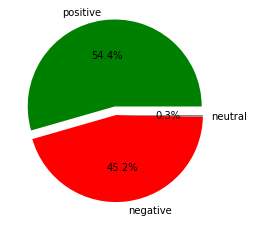

In [39]:
# calculate the percentage of each type of sentiment score
sentiment_type_percentages = sentiment_analysis_df['SENTIMENT_TYPE'].value_counts(normalize=True) * 100

# create the pie chart
fig, ax = plt.subplots()
ax.pie(
    sentiment_type_percentages,
    labels=sentiment_type_percentages.index, 
    colors=['green', 'red', 'grey'], 
    explode=[0.1, 0, 0], 
    autopct='%1.1f%%'
    )

plt.show()

In [40]:
#Saving the new data into a csv
sentiment_analysis_df.to_csv(r"/content/sentiment_data.csv")

The frequency chart below shows that the key topics within the reviews include “flight”, "BA", “London”, “service” and “crew”, showing that people are actively talking about their experience and staff


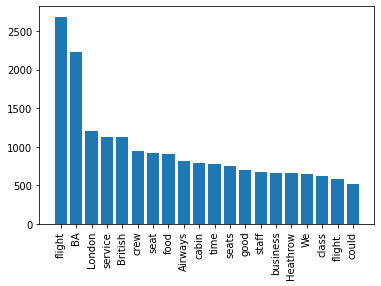

In [43]:
# The frequency chart shows the key topics within the 
# reviews showing what people are actively talking about their experience and staff

# Get the reviews from the dataframe
reviews = sentiment_analysis_df['CONTENT']

# Convert the reviews to a list of words
words = []
for review in reviews:
    words.extend(review.split())

# Filter out the stubborn stop words that don't want to disappear
stopwords = nltk.corpus.stopwords.words('english')
key_words = [word for word in words if word not in stopwords and word not in ['I', 'The','would','one','get','-']]

# Get the top 20 most used key words
word_counts = Counter(key_words)
top_20_words = word_counts.most_common(20)

# Filter out the stop words 
filtered_words = [
    (word, count) for word, count in top_20_words if word not in stopwords and word not in ['I', 'The','would','one','get','-']
    ]

# Get the labels and values for the histogram
labels, values = zip(*top_20_words)

# Create the histogram
plt.bar(labels, values)

# Set the x-axis labels to be vertical
plt.xticks(rotation=90)

#Display the plot
plt.show()

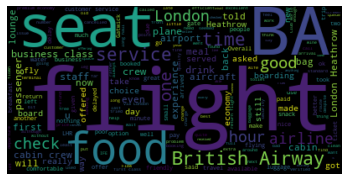

In [44]:
# Import the necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Create the wordcloud
wordcloud = WordCloud(random_state=42).generate(' '.join(sentiment_analysis_df['CONTENT']))

# Show the word cloud
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.show()

The word cloud also showed similar words and key topics within the reviews. This includes “flight”, “BA”, “seat” and “time”, showing that people are actively talking about their experience and staff